In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from utils import *

In [2]:
data = pd.read_excel('数据科学实践Data/LC-Raisin.xlsx', header=2)
data['Class label'] = pd.factorize(data['Class label'])[0]

In [3]:
train_data = data.sample(frac=0.5)
val_test_data = data.drop(train_data.index)
val_data = val_test_data.sample(frac=0.6)
test_data = val_test_data.drop(val_data.index)

In [4]:
train_data.shape, val_data.shape, test_data.shape

((450, 8), (270, 8), (180, 8))

In [5]:
def get_features_labels(data_):
    features = data_.drop(columns=['Class label'])
    labels = data_['Class label']
    return features, labels

In [6]:
def get_data(batch_size):
    train_features, train_labels = get_features_labels(train_data)
    val_features, val_labels = get_features_labels(val_data)
    test_features, test_labels = get_features_labels(test_data)
    train_iter, _, _ = load_data(batch_size, train_features, train_labels)
    val_iter, _, _ = load_data(batch_size, val_features, val_labels)
    test_X, test_y = torch.tensor(test_features.values).float(), torch.tensor(test_labels.values)
    test_X = (test_X - test_X.mean(dim=0)) / test_X.std(dim=0)
    return train_iter, val_iter, test_X, test_y

In [7]:
net = nn.Linear(7, 2)
num_epochs, lr, weight_decay, batch_size = 1000, 0.005, 0.0001, 128
train_iter, val_iter, test_X, test_y = get_data(batch_size)
train_loss, val_loss, train_acc, val_acc, net = train_svm(num_epochs, net, lr, weight_decay, train_iter, val_iter)

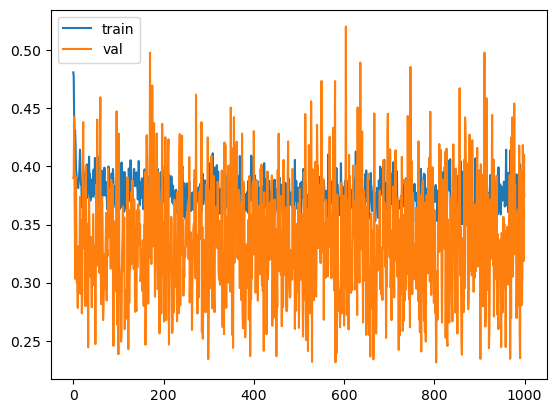

In [8]:
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend()
plt.show()

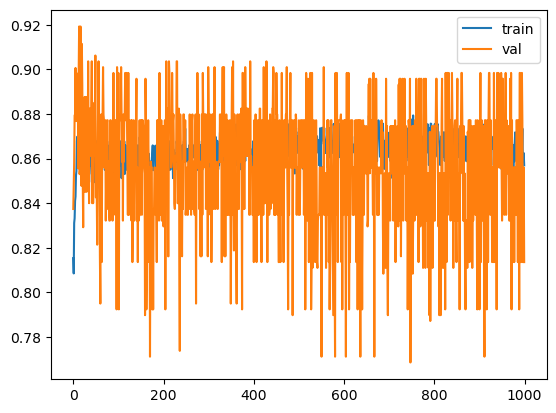

In [9]:
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='val')
plt.legend()
plt.show()

In [10]:
lr_list = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
net = nn.Linear(7, 2)
num_epochs, weight_decay, batch_size = 500, 0.0001, 135

In [11]:
div = {}
for lr in lr_list:
    train_loss, train_acc, val_loss, val_acc, net = train_svm(num_epochs, net, lr, weight_decay, train_iter, val_iter)
    div[lr] = [val_acc[-1], net]

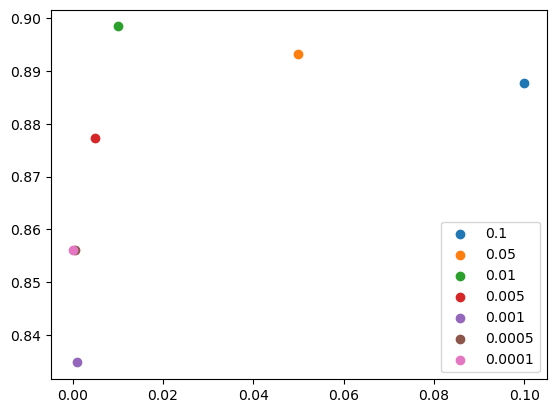

In [ ]:
for lr in lr_list:
    plt.scatter(lr, div[lr][0], label=lr)
plt.legend()
plt.show()

In [16]:
[i for i in div[0.01][1].parameters()]

[Parameter containing:
 tensor([[-4.7253,  1.4943,  1.8179,  0.1363,  3.0689,  0.2290, -3.2978],
         [ 4.9185, -1.5398, -1.9319, -0.2290, -3.6918,  0.4167,  3.0131]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.3784,  0.3355], requires_grad=True)]

In [17]:
net = div[0.01][1]
compute_accuracy(net, test_X, test_y)

0.8388888835906982